## Waste Management using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [14]:
train_path = r"C:\Users\chhav\Desktop\Waste Classification\DATASET\TRAIN"
test_path = r"C:\Users\chhav\Desktop\Waste Classification\DATASET\TEST"

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from glob import glob

In [16]:
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)   
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:28<00:00, 346.83it/s]


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22564 entries, 0 to 22563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   22564 non-null  object
 1   label   22564 non-null  object
dtypes: object(2)
memory usage: 352.7+ KB


In [18]:
data.shape

(22564, 2)

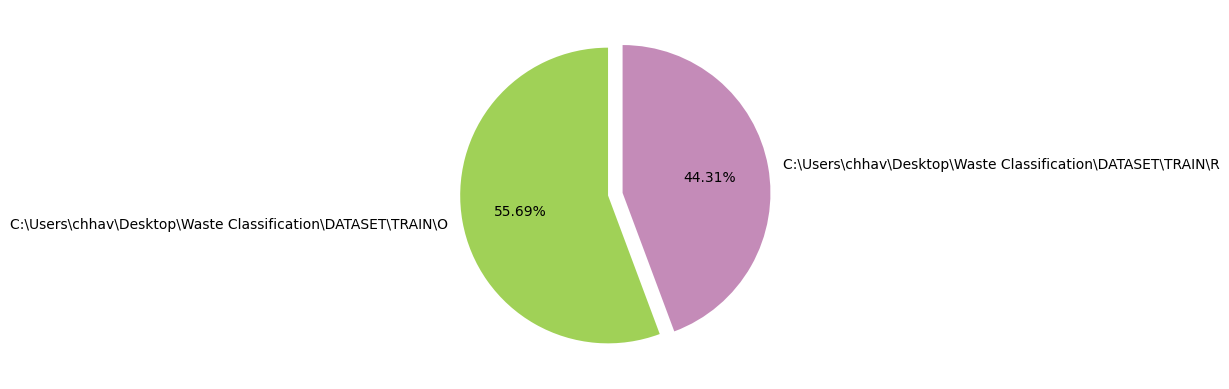

In [23]:
colors = ['#a0d157', '#c48bb8']
labels = data.label.value_counts().index.tolist()
plt.pie(data.label.value_counts(), labels=labels, autopct= '%0.2f%%', colors=colors, startangle = 90, explode = [0.05, 0.05])
plt.show()

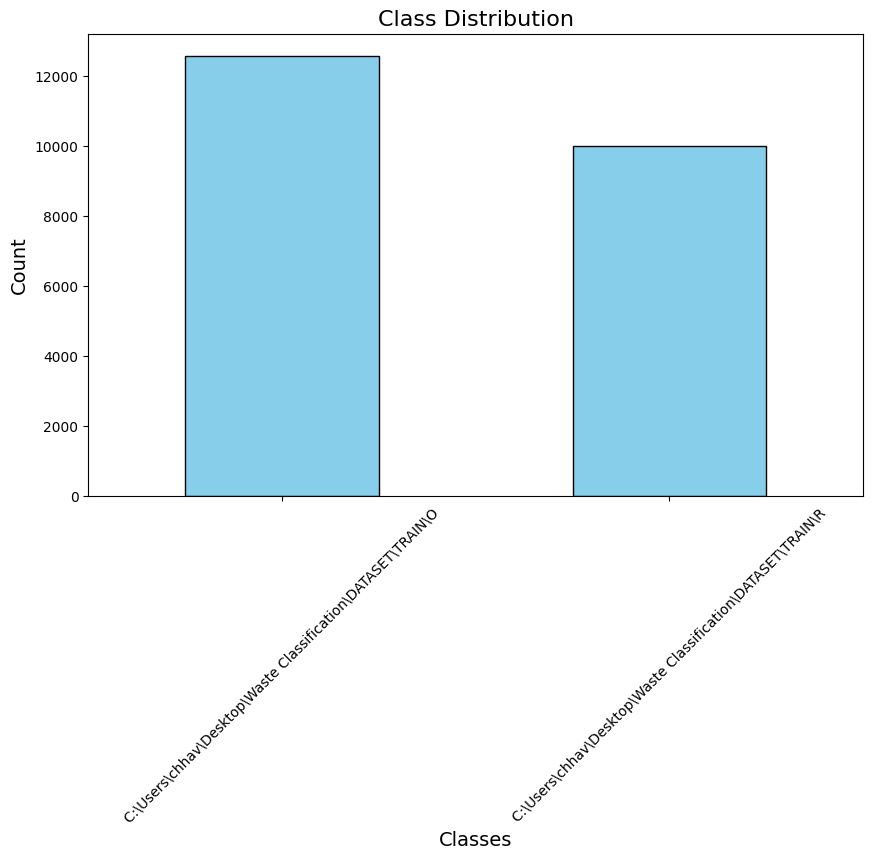

In [29]:
plt.figure(figsize=(10, 6))
data.label.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

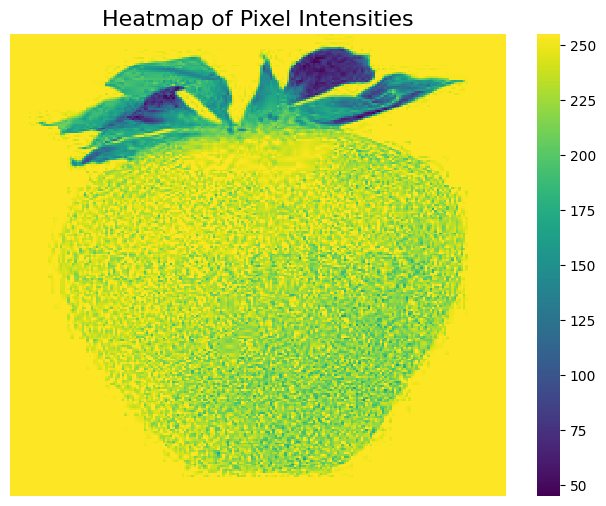

In [33]:
sample_image = x_data[0]  # Pick the first image
plt.figure(figsize=(8, 6))
sns.heatmap(sample_image[:, :, 0], cmap='viridis')  # Red channel only
plt.title('Heatmap of Pixel Intensities', fontsize=16)
plt.axis('off')
plt.show()
